### Autoencoders - Practice with mnist dataset

***1) Simplest Autoencoder with a single fully connected neural layer as encoder and decoder***

In [2]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.utils import plot_model
import numpy as np

Using TensorFlow backend.


*Let's prepare out input data first. We will normalize all the values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.*

In [3]:
(x_train,_),(x_test,_) = mnist.load_data()

# normalizing the values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Converting to 1D Array (Vector respresentation)
x_train = x_train.reshape(-1, np.prod(x_train.shape[1:]))
x_test = x_test.reshape(-1, np.prod(x_test.shape[1:]))

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
# Architecture of Autoencoder

# Size of our encoded representation
encoding_dim = 32

# This is our input image
input_img = keras.Input(shape = (784,))
# This is our encoded representation of input
encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)
# decoded is the lossy resconstruction of input
decoded = layers.Dense(784, activation ='sigmoid')(encoded)

# Instantiating the autoencoder model
autoencoder = keras.Model(input_img, decoded)

In [13]:
# Let's create separate models for encoder and decoder

# encoder
encoder = keras.Model(input_img,encoded)

#decoder

# This is our encoding (32 dimensional) input
encoded_input = keras.Input(shape =(encoding_dim,))

decoder_layer = autoencoder.layers[-1] # retrieve last layer of autoencoder

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [38]:
# configuring the model
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy')

In [39]:
# training the model
autoencoder.fit(x_train,x_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data =(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2769 - val_loss: 0.1909
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1712 - val_loss: 0.1534
Epoch 3/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1437 - val_loss: 0.1329
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1275 - val_loss: 0.1202
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1168 - val_loss: 0.1113
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1095 - val_loss: 0.1053
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1044 - val_loss: 0.1012
Epoch 8/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1010 - val_loss: 0.0984
Epoch 9/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0986 - val_loss: 0.0967
Epoch

In [40]:
# Encode and decode some digits from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

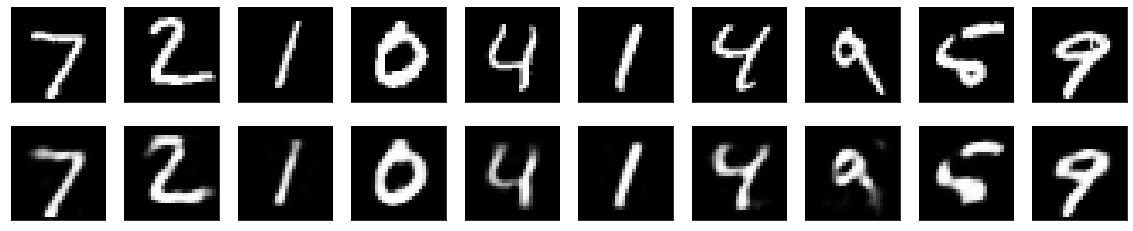

In [41]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

***2) Sparse Autoencoders -*** Another way to constrain the representations to be compact is to add sparsity constraint on the activity of hidden representations, so **fewer units would "fire"** at a given time. In keras we can do this by adding **activity_regularizer** to the dense layer. We can also train our network for longer time as with added regularzation the model is less likely to overfit.

In [69]:
from keras import regularizers
encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation = 'relu', 
                       activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation ='sigmoid')(encoded)

SparseAutoEncoders = keras.Model(input_img,decoded)

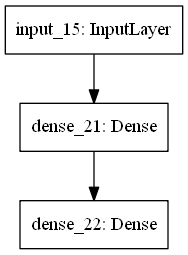

In [70]:
# plot_model(SparseAutoEncoders)

In [71]:
SparseAutoEncoders.compile(optimizer = 'adam', loss = 'binary_crossentropy')
SparseAutoEncoders.fit(x_train,x_train,
                      epochs = 100,
                      batch_size = 256,
                      validation_data = (x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.6555 - val_loss: 0.6154
Epoch 2/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.5831 - val_loss: 0.5534
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.5273 - val_loss: 0.5037
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4826 - val_loss: 0.4637
Epoch 5/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.4465 - val_loss: 0.4313
Epoch 6/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4173 - val_loss: 0.4049
Epoch 7/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.3934 - val_loss: 0.3833
Epoch 8/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.3738 - val_loss: 0.3655
Epoch 9/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.3576 - val_loss: 0.3

In [72]:
# Encode and decode some digits from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

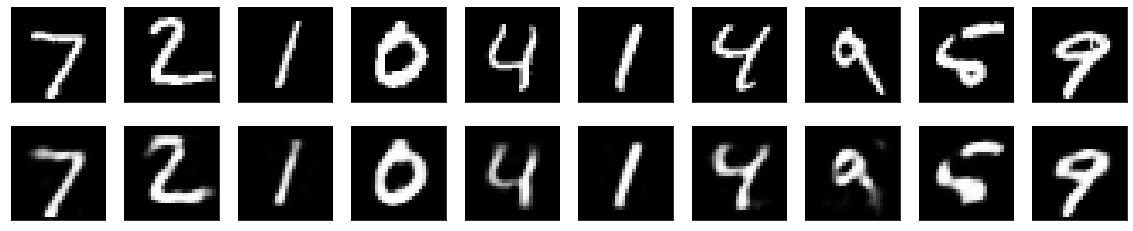

In [73]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

***2) Deep Autoencoders -*** Until now we had a single layer of encoder and decoder. We'll build a network (having more layers)

In [31]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(128, activation = 'relu')(input_img)
encoded = layers.Dense(64, activation ='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'relu')(encoded)

decoded = layers.Dense(64, activation ='relu')(encoded)
decoded = layers.Dense(128, activation ='relu')(decoded)
decoded = layers.Dense(784, activation ='sigmoid')(decoded)

DeepAutoEncoder = keras.Model(input_img, decoded)
DeepAutoEncoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
DeepAutoEncoder.fit(x_train,x_train,
                    epochs = 100,
                    batch_size = 256,
                    shuffle = True,
                    validation_data = (x_test,x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.2493 - val_loss: 0.1688
Epoch 2/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1524 - val_loss: 0.1397
Epoch 3/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1341 - val_loss: 0.1262
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1229 - val_loss: 0.1169
Epoch 5/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1158 - val_loss: 0.1118
Epoch 6/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1113 - val_loss: 0.1081
Epoch 7/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1079 - val_loss: 0.1050
Epoch 8/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1048 - val_loss: 0.1021
Epoch 9/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1022 - val_loss: 0.1

60000/60000 [==============================] - 3s 49us/step - loss: 0.0818 - val_loss: 0.0816
Epoch 78/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0817 - val_loss: 0.0813
Epoch 79/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0817 - val_loss: 0.0817
Epoch 80/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0817 - val_loss: 0.0820
Epoch 81/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0817 - val_loss: 0.0815
Epoch 82/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0816 - val_loss: 0.0814
Epoch 83/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0815 - val_loss: 0.0813
Epoch 84/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0815 - val_loss: 0.0811
Epoch 85/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0814 - val_loss: 0.0813
Epoch 86/100
60000/60000 [========================

In [32]:
# encoder
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
# decoder
decoder_layer1 = DeepAutoEncoder.layers[-3]
decoder_layer2 = DeepAutoEncoder.layers[-2]
decoder_layer3 = DeepAutoEncoder.layers[-1]
decoder = keras.Model(encoded_input, 
                      decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

In [33]:
# Encode and decode some digits from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

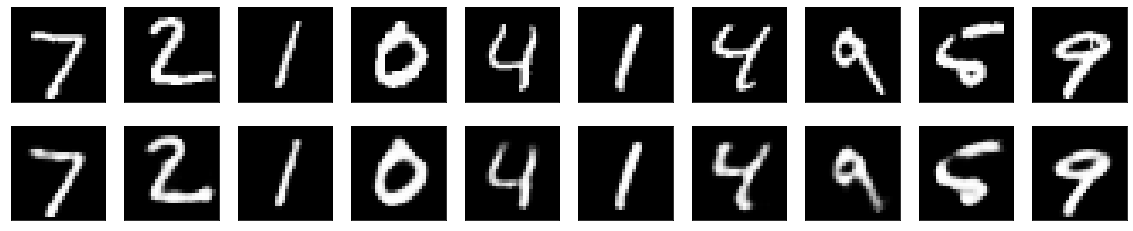

In [34]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The loss decreased in comparison with the other two models ~0.08. This deep autoencoder is a better model than the above two.